## 3.1 Introduction<a id='2.2_Introduction'></a>


This step focuses on pre-processing and training the data

### 3.2  Recap Of Data Science Problem<a id='2.2.1_Recap_Of_Data_Science_Problem'></a>


In this project, we are trying to create a fraud detection system to predict fraud from the data provided on kaggle 
https://www.kaggle.com/shivamb/vehicle-claim-fraud-detection

## 3.3 Objectives<a id='2.4_Objectives'></a>

The objectives of this step is to do necessary pre-processing and training the data by selecting features and running differnt models to determine which models are  appropriate for detection of fraudelent claims transactions.

## 3.4.Load The Vehicle Claim Data 

In [1]:
import pandas as pd
vf = pd.read_csv("fraud_oracle.csv")

In [2]:
#Calling  the info method on vf to see info about the data
vf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

## 3.5 Pre-Processing and Training Data

## 3.5.1 Imports

In [3]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime


## 3.5.2  Feature Engineering

### 3.5.2.1 Converting age column into 4 bins

In [4]:
## Converting age column into bins 
vf['age_bins'] = pd.cut(x=vf['Age'], bins=[-1,21,41,61,81], labels=['teens', 'young', 'middle','old'])

#### Checking the histogram to look at the distribution

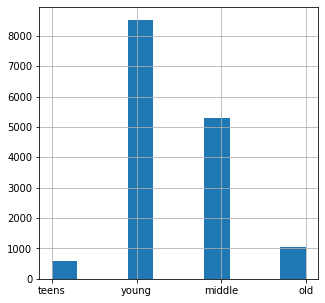

In [5]:
vf.age_bins.hist(figsize=(5,5))
plt.show()

In [6]:
vf.shape

(15420, 34)

## 3.5.2.2 Making a copy of original data frame


In [7]:
vfm=vf.copy()

In [8]:
vflabel=vf.copy()

### Dropping features which are not adding any value

In [9]:
vflabel.drop(['PolicyNumber','RepNumber','Age'],axis=1,inplace=True)

### Checking the columns in new dataframe

In [10]:
vflabel.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'Deductible', 'DriverRating',
       'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims',
       'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled',
       'WitnessPresent', 'AgentType', 'NumberOfSuppliments',
       'AddressChange_Claim', 'NumberOfCars', 'Year', 'BasePolicy',
       'age_bins'],
      dtype='object')

### Installing category encoders for doing necessary encoding for categorical features

In [11]:
!pip install category_encoders

In [12]:
import category_encoders as ce

In [13]:
cols=['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'Deductible', 'DriverRating',
       'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims',
       'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled',
       'WitnessPresent', 'AgentType', 'NumberOfSuppliments',
       'AddressChange_Claim', 'NumberOfCars', 'Year', 'BasePolicy',
       'age_bins']

###  Using Target Encoder for encoding the categorical features

In [14]:
enc = ce.TargetEncoder(cols=cols)

C:\Users\vrastogi\Anaconda3\envs\Pycaret37\lib\site-packages\category_encoders\target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
C:\Users\vrastogi\Anaconda3\envs\Pycaret37\lib\site-packages\category_encoders\target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


###  Splitting the data into train and test and stratifying by target variable

In [15]:
#Peform the train test split 
X_trl, X_tel, y_trl, y_tel = train_test_split(vflabel.drop(columns='FraudFound_P'), 
                                                    vflabel.FraudFound_P, test_size=0.2, 
                                                    random_state=47,stratify=vflabel.FraudFound_P)

###  Transforming train and test features 

In [16]:
lab_train = enc.fit_transform(X_trl, y_trl)
lab_test=enc.transform(X_tel)

###  Checking the info for train data

In [17]:
lab_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12336 entries, 1010 to 3219
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Month                 12336 non-null  float64
 1   WeekOfMonth           12336 non-null  float64
 2   DayOfWeek             12336 non-null  float64
 3   Make                  12336 non-null  float64
 4   AccidentArea          12336 non-null  float64
 5   DayOfWeekClaimed      12336 non-null  float64
 6   MonthClaimed          12336 non-null  float64
 7   WeekOfMonthClaimed    12336 non-null  float64
 8   Sex                   12336 non-null  float64
 9   MaritalStatus         12336 non-null  float64
 10  Fault                 12336 non-null  float64
 11  PolicyType            12336 non-null  float64
 12  VehicleCategory       12336 non-null  float64
 13  VehiclePrice          12336 non-null  float64
 14  Deductible            12336 non-null  float64
 15  DriverRating     

### Checking the info for test data

In [18]:
lab_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3084 entries, 14424 to 13338
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Month                 3084 non-null   float64
 1   WeekOfMonth           3084 non-null   float64
 2   DayOfWeek             3084 non-null   float64
 3   Make                  3084 non-null   float64
 4   AccidentArea          3084 non-null   float64
 5   DayOfWeekClaimed      3084 non-null   float64
 6   MonthClaimed          3084 non-null   float64
 7   WeekOfMonthClaimed    3084 non-null   float64
 8   Sex                   3084 non-null   float64
 9   MaritalStatus         3084 non-null   float64
 10  Fault                 3084 non-null   float64
 11  PolicyType            3084 non-null   float64
 12  VehicleCategory       3084 non-null   float64
 13  VehiclePrice          3084 non-null   float64
 14  Deductible            3084 non-null   float64
 15  DriverRating    

### Merging the independent and target variables in the data frame for both train and test data and checking first 5 rows

In [19]:
lab_traindf=pd.concat([lab_train,y_trl],axis='columns')
lab_testdf=pd.concat([lab_test,y_tel],axis='columns')
lab_traindf.head(5).T

,1010,14605,5450,3474,3842
Month,0.048924,0.070780,0.074661,0.070780,0.059629
WeekOfMonth,0.059866,0.055094,0.059866,0.059866,0.057064
DayOfWeek,0.070664,0.064614,0.062681,0.064614,0.053916
Make,0.063669,0.057018,0.132597,0.053402,0.056928
AccidentArea,0.057073,0.057073,0.057073,0.057073,0.083594
DayOfWeekClaimed,0.057944,0.063532,0.068307,0.063532,0.063532
MonthClaimed,0.043908,0.057900,0.081264,0.070320,0.077876
WeekOfMonthClaimed,0.064304,0.057325,0.055276,0.059437,0.064304
Sex,0.041841,0.063124,0.063124,0.063124,0.063124
MaritalStatus,0.060319,0.060319,0.060319,0.058529,0.058529


### Using pycaret for quickly checking the impact of targer encoder on different model performance: 
#### We are doing this exercise only on train data 

In [22]:

from pycaret.classification import *
s = setup(lab_traindf, target = 'FraudFound_P',data_split_stratify=True,
          fix_imbalance = True,train_size=0.8,fold_shuffle=True,
            feature_selection=True,feature_selection_threshold=0.3,
            ignore_low_variance =False,remove_multicollinearity = True,combine_rare_levels=True,session_id=1122)

,Description,Value
0,session_id,1122
1,Target,FraudFound_P
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(12336, 31)"
5,Missing Values,False
6,Numeric Features,24
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [23]:
setup_label = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9406,0.8225,0.0712,0.5642,0.1252,0.1126,0.1825,0.1010
gbc,Gradient Boosting Classifier,0.9404,0.8197,0.0373,0.6069,0.0688,0.0616,0.1327,0.9260
dummy,Dummy Classifier,0.9402,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0130
rf,Random Forest Classifier,0.9399,0.8093,0.0593,0.4988,0.1045,0.0928,0.1531,0.6490
et,Extra Trees Classifier,0.9361,0.8116,0.0763,0.3418,0.1237,0.1045,0.1375,0.4940
ada,Ada Boost Classifier,0.9058,0.7851,0.1627,0.1833,0.1708,0.1215,0.1224,0.2370
dt,Decision Tree Classifier,0.8821,0.5580,0.1898,0.1417,0.1619,0.1002,0.1015,0.0330
nb,Naive Bayes,0.8724,0.8080,0.3237,0.1818,0.2313,0.1680,0.1772,0.0140
qda,Quadratic Discriminant Analysis,0.8282,0.8051,0.4559,0.1655,0.2402,0.1678,0.1966,0.0170
knn,K Neighbors Classifier,0.7997,0.7180,0.5051,0.1512,0.2326,0.1547,0.1921,0.2840


### Selecting the best model based on recall and tuning it

In [24]:
label_gbc = create_model('gbc',fold=10)
tuned_label_gbc=tune_model(label_gbc,optimize='Recall',fold=10)
print(tuned_label_gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4002,0.6572,0.9492,0.0868,0.1591,0.0557,0.1567
1,0.3951,0.6783,1.0000,0.0899,0.1650,0.0622,0.1791
2,0.3830,0.6322,0.9153,0.0821,0.1506,0.0460,0.1330
3,0.3658,0.6548,0.9831,0.0849,0.1563,0.0520,0.1590
4,0.4032,0.6747,0.9831,0.0898,0.1645,0.0618,0.1742
5,0.3880,0.6666,0.9831,0.0877,0.1611,0.0577,0.1680
6,0.3931,0.6693,0.9831,0.0884,0.1622,0.0590,0.1701
7,0.4002,0.6652,0.9661,0.0881,0.1615,0.0583,0.1648
8,0.3651,0.6385,0.9492,0.0825,0.1518,0.0468,0.1419


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.0001, loss='deviance', max_depth=1,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.5, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=4,
                           min_weight_fraction_leaf=0.0, n_estimators=260,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1122, subsample=0.45, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


### Checking the model for prediction

In [25]:
pred_label_gbc=predict_model(tuned_label_gbc)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.3805,0.6641,0.9865,0.0873,0.1604,0.0564,0.1668


### Testing the model on unseen data 

In [26]:
pred_label_gbc=predict_model(tuned_label_gbc,data=lab_testdf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.3671,0.6355,0.9405,0.0823,0.1513,0.0461,0.1386


### The model  although performed well for recall but precision and F1 SCORES are very low

#### Saving the vflabel dataframe to csv

In [33]:
vflabel.to_csv('C:/Users/vrastogi/GitHubFiles/Vehicle Fraud Capstone/vflabel.csv')

###  Earlier we noticed that MonthClaimed had 13 values, which cannot be true

In [34]:
item_month_claimed = vf['MonthClaimed'].value_counts(normalize=True)
print(item_month_claimed)

Jan    0.093774
May    0.091505
Mar    0.087419
Oct    0.086835
Jun    0.083852
Feb    0.083463
Nov    0.083333
Apr    0.082425
Sep    0.080545
Jul    0.079442
Dec    0.074319
Aug    0.073022
0      0.000065
Name: MonthClaimed, dtype: float64


In [35]:
item_month_claimed1 = vf['MonthClaimed'].value_counts()
print(item_month_claimed1)

Jan    1446
May    1411
Mar    1348
Oct    1339
Jun    1293
Feb    1287
Nov    1285
Apr    1271
Sep    1242
Jul    1225
Dec    1146
Aug    1126
0         1
Name: MonthClaimed, dtype: int64


***We have one entry with month 0, but it may not impact our results***

***We can impute or drop that row***


## Trying dummy variable approach to see if it works better for our model

In [36]:
vfm_dummies=pd.get_dummies(vfm[['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice','Deductible','FraudFound_P', 'DriverRating',
       'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims',
       'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled',
       'WitnessPresent', 'AgentType', 'NumberOfSuppliments',
       'AddressChange_Claim', 'NumberOfCars', 'Year', 'BasePolicy',
       'age_bins']],drop_first=True)

***Making a list of dummy features***

In [37]:
## making a list of dummy features to ensure the process is done properly
vfm_dummies.columns.to_list()

['WeekOfMonth',
 'WeekOfMonthClaimed',
 'Deductible',
 'FraudFound_P',
 'DriverRating',
 'Year',
 'Month_Aug',
 'Month_Dec',
 'Month_Feb',
 'Month_Jan',
 'Month_Jul',
 'Month_Jun',
 'Month_Mar',
 'Month_May',
 'Month_Nov',
 'Month_Oct',
 'Month_Sep',
 'DayOfWeek_Monday',
 'DayOfWeek_Saturday',
 'DayOfWeek_Sunday',
 'DayOfWeek_Thursday',
 'DayOfWeek_Tuesday',
 'DayOfWeek_Wednesday',
 'Make_BMW',
 'Make_Chevrolet',
 'Make_Dodge',
 'Make_Ferrari',
 'Make_Ford',
 'Make_Honda',
 'Make_Jaguar',
 'Make_Lexus',
 'Make_Mazda',
 'Make_Mecedes',
 'Make_Mercury',
 'Make_Nisson',
 'Make_Pontiac',
 'Make_Porche',
 'Make_Saab',
 'Make_Saturn',
 'Make_Toyota',
 'Make_VW',
 'AccidentArea_Urban',
 'DayOfWeekClaimed_Friday',
 'DayOfWeekClaimed_Monday',
 'DayOfWeekClaimed_Saturday',
 'DayOfWeekClaimed_Sunday',
 'DayOfWeekClaimed_Thursday',
 'DayOfWeekClaimed_Tuesday',
 'DayOfWeekClaimed_Wednesday',
 'MonthClaimed_Apr',
 'MonthClaimed_Aug',
 'MonthClaimed_Dec',
 'MonthClaimed_Feb',
 'MonthClaimed_Jan',
 'M

***We can see that 'WeekOfMonth','WeekOfMonthClaimed','Deductible','DriverRating','Year' are still there and they are not converted to dummies***

***Converting these features to categories***

In [38]:
## Converting the columns to categories 
for col in ['WeekOfMonth','WeekOfMonthClaimed','Deductible','DriverRating','Year']:
    vfm_dummies[col] = vfm_dummies[col].astype('category')

***Creating dummy features for these categorical features now***

In [39]:
### Creating dummy features
vfm_dummies1=pd.get_dummies(vfm_dummies[['WeekOfMonth','WeekOfMonthClaimed','Deductible','DriverRating','Year']],drop_first=True)

***Checking to see the list of these dummy features***

In [40]:
vfm_dummies1.columns.to_list()

['WeekOfMonth_2',
 'WeekOfMonth_3',
 'WeekOfMonth_4',
 'WeekOfMonth_5',
 'WeekOfMonthClaimed_2',
 'WeekOfMonthClaimed_3',
 'WeekOfMonthClaimed_4',
 'WeekOfMonthClaimed_5',
 'Deductible_400',
 'Deductible_500',
 'Deductible_700',
 'DriverRating_2',
 'DriverRating_3',
 'DriverRating_4',
 'Year_1995',
 'Year_1996']

***Making a new dataframe with all dummy features***

In [41]:
### Merging the dataframe with new dummy features with old one
vfmerged=pd.concat([vfm_dummies,vfm_dummies1],axis='columns')

***Dropping original features as we do not need them***

In [42]:
### Dropping the original features so only dummy features are in the dataframe
vfmerged.drop(['WeekOfMonth','WeekOfMonthClaimed','Deductible','DriverRating','Year'],axis=1, inplace=True)

***Checking to see if all dummy features are there as we anticipated***

In [43]:
vfmerged.columns.to_list()

['FraudFound_P',
 'Month_Aug',
 'Month_Dec',
 'Month_Feb',
 'Month_Jan',
 'Month_Jul',
 'Month_Jun',
 'Month_Mar',
 'Month_May',
 'Month_Nov',
 'Month_Oct',
 'Month_Sep',
 'DayOfWeek_Monday',
 'DayOfWeek_Saturday',
 'DayOfWeek_Sunday',
 'DayOfWeek_Thursday',
 'DayOfWeek_Tuesday',
 'DayOfWeek_Wednesday',
 'Make_BMW',
 'Make_Chevrolet',
 'Make_Dodge',
 'Make_Ferrari',
 'Make_Ford',
 'Make_Honda',
 'Make_Jaguar',
 'Make_Lexus',
 'Make_Mazda',
 'Make_Mecedes',
 'Make_Mercury',
 'Make_Nisson',
 'Make_Pontiac',
 'Make_Porche',
 'Make_Saab',
 'Make_Saturn',
 'Make_Toyota',
 'Make_VW',
 'AccidentArea_Urban',
 'DayOfWeekClaimed_Friday',
 'DayOfWeekClaimed_Monday',
 'DayOfWeekClaimed_Saturday',
 'DayOfWeekClaimed_Sunday',
 'DayOfWeekClaimed_Thursday',
 'DayOfWeekClaimed_Tuesday',
 'DayOfWeekClaimed_Wednesday',
 'MonthClaimed_Apr',
 'MonthClaimed_Aug',
 'MonthClaimed_Dec',
 'MonthClaimed_Feb',
 'MonthClaimed_Jan',
 'MonthClaimed_Jul',
 'MonthClaimed_Jun',
 'MonthClaimed_Mar',
 'MonthClaimed_May',

In [44]:
vfmerged.shape

(15420, 136)

***New DataFrame has 136 features***

###  4.4.4  Splitting the data into train and test

In [45]:
#Peform the train test split 
X_train, X_test, y_train, y_test = train_test_split(vfmerged.drop(columns='FraudFound_P'), 
                                                    vfmerged.FraudFound_P, test_size=0.1, 
                                                    random_state=47,stratify=vfmerged.FraudFound_P)

In [46]:
### checking the shape after train, test split
print(f"train data shape:{X_train.shape}")
print(f"Test data shape:{X_test.shape}")


train data shape:(13878, 135)
Test data shape:(1542, 135)


In [47]:
### checking the shape after train, test split
print(f"train target shape:{y_train.shape}")
print(f"Test target shape:{y_test.shape}")


train target shape:(13878,)
Test target shape:(1542,)


### Balancing the target  class using different approaches

We can handle imbalanced classes by balancing the classes by increasing minority or decreasing majority.

We can do that by following few techniques

Random Under-Sampling
Random Over-Sampling
SMOTE - Synthetic Minority Oversampling Technique
ADASYN - Adaptive Synthetic Sampling Method
SMOTETomek - Over-sampling followed by under-sampling
Unddersampling tends to loss of data so we will not use that. We will go with Random Over-Sampling, SMOTE - Synthetic Minority Oversampling Technique, ADASYN - Adaptive Synthetic Sampling Method and see which technique works better.

###  Installing and importing necessary libraries

In [50]:
! pip install imbalanced-learn

In [51]:
from imblearn.over_sampling import RandomOverSampler,ADASYN,SMOTE
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

### Creating 4 different training dataset with different sampling techniques

#### Using Smote over sampling

In [57]:
### https://github.com/pujappathak/Credit-Card-Fraud-Detection/blob/main/Puja%20Pathak%20-%20Capstone%20Project%20-%20Credit%20Card%20Fraud%20Detection.ipynb
## SMOTE OVER SAMPLING
smt = SMOTE(random_state=45, k_neighbors=5)
X_resampled_sm, y_resampled_sm = smt.fit_resample(X_train, y_train)
print(f"Total length of len:{len(X_resampled_sm)}")
print(f"New Distribution of out target label:{sorted(Counter(y_resampled_sm).items())}")                        
                            


Total length of len:26094
New Distribution of out target label:[(0, 13047), (1, 13047)]


### Using Random Over Sampler

In [52]:
### https://github.com/pujappathak/Credit-Card-Fraud-Detection/blob/main/Puja%20Pathak%20-%20Capstone%20Project%20-%20Credit%20Card%20Fraud%20Detection.ipynb
## Random Over Sampling
over_sample = RandomOverSampler(sampling_strategy = 1)
X_resampled_ro, y_resampled_ro = over_sample.fit_resample(X_train, y_train)
print(f"Total length of len:{len(X_resampled_ro)}")
print(f"New Distribution of out target label:{sorted(Counter(y_resampled_ro).items())}")

Total length of len:26094
New Distribution of out target label:[(0, 13047), (1, 13047)]


***Important to remember sampling strategy=1.0 makes equal number of data points for both classes***


***sampling strategy=0.5 had majority class= 2* minority class***

## Using ADASYN method for over  sampling

In [53]:
### https://github.com/pujappathak/Credit-Card-Fraud-Detection/blob/main/Puja%20Pathak%20-%20Capstone%20Project%20-%20Credit%20Card%20Fraud%20Detection.ipynb
## ADASYN
ada = ADASYN(random_state=45, n_neighbors=5)
X_resampled_ad, y_resampled_ad = ada.fit_resample(X_train, y_train)
print(f"Total length of len:{len(X_resampled_ad)}")
print(f"New Distribution of out target label:{sorted(Counter(y_resampled_ad).items())}")

Total length of len:26135
New Distribution of out target label:[(0, 13047), (1, 13088)]


### Using Random Under Sampler

In [54]:
### https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
under = RandomUnderSampler(sampling_strategy=1.0)
X_resampled_u, y_resampled_u = under.fit_resample(X_train, y_train)
print(f"Total length of len:{len(X_resampled_u)}")
print(f"New Distribution of out target label:{sorted(Counter(y_resampled_u).items())}")

Total length of len:1662
New Distribution of out target label:[(0, 831), (1, 831)]


#### Making Dataframe for SMOTE

In [58]:
### Dataframe for smote
smote=pd.concat([X_resampled_sm, y_resampled_sm],axis=1)
smote.shape

(26094, 136)

### Making Data Frame for Random Over Sampler

In [60]:
### Dataframe for Random Over Sampling
os=pd.concat([X_resampled_ro, y_resampled_ro],axis=1)
os.shape

(26094, 136)

### Making Data Frame for ADASYN

In [63]:
Adasyn=pd.concat([X_resampled_ad, y_resampled_ad],axis=1)
Adasyn.shape

(26135, 136)

#### Making Data Frame for Random Under Sampler

In [64]:
un=pd.concat([X_resampled_u, y_resampled_u],axis=1)
un.shape

(1662, 136)

###  Running pycaret models for the classification with new dataframe with features converted into dummy variabels

1. SMOTE

In [65]:
from pycaret.classification import *
sm = setup(smote, target = 'FraudFound_P',data_split_stratify=True,pca = True, pca_components =3,session_id=1122)
smote_best = compare_models(fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9665,0.9697,0.9342,0.9987,0.9654,0.9330,0.9349,0.5220
et,Extra Trees Classifier,0.9656,0.9696,0.9333,0.9977,0.9644,0.9311,0.9331,0.3460
gbc,Gradient Boosting Classifier,0.9651,0.9711,0.9311,0.9989,0.9638,0.9301,0.9323,0.4500
ada,Ada Boost Classifier,0.9649,0.9702,0.9309,0.9987,0.9636,0.9297,0.9319,0.1580
lightgbm,Light Gradient Boosting Machine,0.9641,0.9690,0.9304,0.9978,0.9629,0.9283,0.9304,0.0540
qda,Quadratic Discriminant Analysis,0.9638,0.9727,0.9276,1.0000,0.9624,0.9276,0.9301,0.0100
nb,Naive Bayes,0.9637,0.9730,0.9274,1.0000,0.9623,0.9274,0.9299,0.0100
knn,K Neighbors Classifier,0.9634,0.9668,0.9301,0.9965,0.9622,0.9269,0.9289,0.5560
lr,Logistic Regression,0.9626,0.9651,0.9251,1.0000,0.9611,0.9251,0.9277,0.7720
dt,Decision Tree Classifier,0.9374,0.9374,0.9393,0.9358,0.9375,0.8748,0.8749,0.0240


#### Optimizing Random Forest Model

In [66]:
### Random Forest Classifier gave best prediction. Use it for hyper parameter tuning
smote_rf = create_model('rf',fold=5)
tuned_smote_rf=tune_model(smote_rf,optimize='Precision',fold=5)
print(tuned_smote_rf)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9669,0.9668,0.9337,1.0000,0.9657,0.9338,0.9358
1,0.9650,0.9652,0.9310,0.9988,0.9637,0.9299,0.9321
2,0.9663,0.9663,0.9326,1.0000,0.9651,0.9327,0.9348
3,0.9644,0.9647,0.9288,1.0000,0.9631,0.9288,0.9312
4,0.9625,0.9628,0.9250,1.0000,0.9610,0.9250,0.9276
Mean,0.9650,0.9652,0.9302,0.9998,0.9638,0.9300,0.9323
Std,0.0015,0.0014,0.0031,0.0005,0.0016,0.0031,0.0029


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.2,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=20, n_jobs=-1, oob_score=False,
                       random_state=1122, verbose=0, warm_start=False)


*** The model seems to be over fitting ***

### Prediction using tuned random forest model

In [68]:
pred_smote_rf=predict_model(tuned_smote_rf)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9664,0.9665,0.9331,0.9997,0.9653,0.9328,0.9349


*** The model performed well for the data splitted for test data set***

### Testing the model on unseen data we hold out earlier

### Preparing dataframe for validation: Hold out data

In [70]:
Test=pd.concat([X_test,y_test],axis=1)
Test.shape

(1542, 136)

#### Predicting using tuned random forest model on unseen validation data set

In [72]:
predunseenlgbm=predict_model(tuned_smote_rf, data=Test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9403,0.4983,0.0000,0.0000,0.0000,0.0000,0.0000


***This model did not generalize at all on unseen data ***

### Potential issues :
1. Overfitting
2. Distribution of data set in unseen data is not the same 
3. May be number of features are too high as dimensionality increased significantly


### Summary